<a href="https://colab.research.google.com/github/Ad0ol/Computer-Vision-Techniques-for-Image-Segmentation/blob/master/1_Threshold_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from skimage import color
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt 
from skimage.metrics import (adapted_rand_error, variation_of_information)

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


(300, 300, 3)


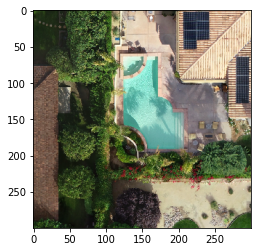

In [0]:
path0 = '/content/gdrive/My Drive/Adal&Norah-Project-CEN546/sample_images/'
path = path0+'image-chips/'
image = plt.imread(path+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
print(image.shape)
plt.imshow(image)

(300, 300, 3)


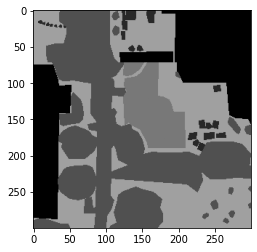

In [0]:
path = path0+'label-chips/'
GT = plt.imread(path+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
print(GT.shape)
plt.imshow(GT*40)

# (075, 025, 230) : BUILDING
# (180, 030, 145) : CLUTTER
# (075, 180, 060) : VEGETATION
# (048, 130, 245) : WATER
# (255, 255, 255) : GROUND


(300, 300)


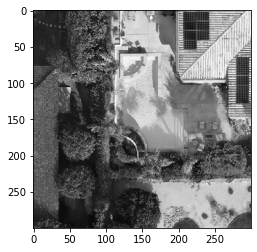

In [0]:
gray_original = rgb2gray(image)
plt.imshow(gray_original, cmap='gray')
print(gray_original.shape)

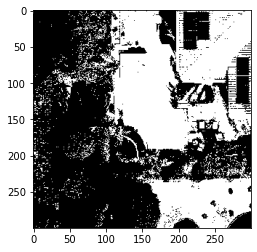

In [0]:
gray_r = gray_original.reshape(gray_original.shape[0]*gray_original.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray_bw = gray_r.reshape(gray_original.shape[0],gray_original.shape[1])
plt.imshow(gray_bw, cmap='gray')

In [0]:
gray_original = color.rgb2gray(image)
print(np.min(gray_original)  , np.max(gray_original))

0.0067270594 0.99999994


90000


Text(0.5, 1.0, 'Threshold Segmentation')

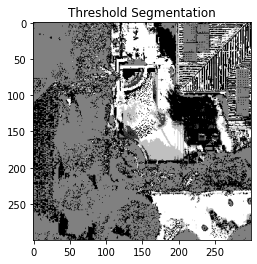

In [0]:
gray_original = rgb2gray(image)

gray_r = gray_original.copy()
gray_r = gray_original.reshape(gray_original.shape[0]*gray_original.shape[1])
print(gray_r.shape[0])
for i in range(gray_r.shape[0]):
    if gray_r[i] >  220/255:
        gray_r[i] = 0 #BUILDING 
    elif gray_r[i] > 170/255:
        gray_r[i] = 4  #GROUND
    elif gray_r[i] > 140/255:  # 140 to 170
        gray_r[i] = 3  # WATER
    elif gray_r[i] > 130/255:
        gray_r[i] = 1  # CLUTTER
    elif gray_r[i] > 90/255:
        gray_r[i] = 0 #BUILDING
    elif gray_r[i] > 20/255:
        gray_r[i] = 2  #VEGETATION
    else:
        gray_r[i] = 0

gray_original = gray_r.reshape(gray_original.shape[0],gray_original.shape[1])
plt.imshow(gray_original, cmap='gray')
gray_original.shape[0]
plt.title("Threshold Segmentation")

In [0]:
Grount_truth_img = rgb2gray(GT)
print(np.unique(Grount_truth_img))

Grount_truth_pixcels=np.around(Grount_truth_img*1000,decimals=0)

Grount_truth_pixcelsInt=Grount_truth_pixcels.astype(int)
print(np.unique(Grount_truth_pixcelsInt))
print(Grount_truth_pixcelsInt.shape)

[0.         0.00392157 0.00784314 0.01176471 0.01568628]
[ 0  4  8 12 16]
(300, 300)


90000
300
[0 1 2 3 4]
[0 1 2 3 4]
(300, 300)


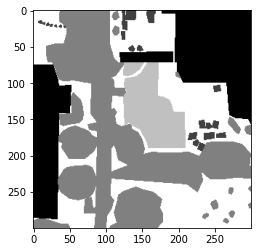

In [0]:

Grount_truth_img_Test = Grount_truth_pixcelsInt.copy()
Grount_truth_img_Test = Grount_truth_pixcelsInt.reshape(Grount_truth_pixcelsInt.shape[0]*Grount_truth_pixcelsInt.shape[1])
for i in range(Grount_truth_img_Test.shape[0]):
    if Grount_truth_img_Test[i] == 0:
        Grount_truth_img_Test[i] = 0  
    elif Grount_truth_img_Test[i] == 4:
        Grount_truth_img_Test[i] = 1 
    elif Grount_truth_img_Test[i] == 12:  
        Grount_truth_img_Test[i] = 3  
    elif Grount_truth_img_Test[i] == 8:  
        Grount_truth_img_Test[i] = 2  
    elif Grount_truth_img_Test[i] == 16:  
        Grount_truth_img_Test[i] = 4  

print (Grount_truth_img_Test.shape[0])    
Grount_truth_pixcelsInt = Grount_truth_img_Test.reshape(Grount_truth_pixcelsInt.shape[0],Grount_truth_pixcelsInt.shape[1])
print (Grount_truth_pixcelsInt.shape[0])    

print(np.unique(Grount_truth_pixcelsInt))
gray_rInt=gray_original.astype(int)

print(np.unique(gray_rInt))
print(gray_rInt.shape)
plt.imshow(Grount_truth_pixcelsInt, cmap='gray')

In [0]:
error, precision, recall = adapted_rand_error(Grount_truth_pixcelsInt, gray_rInt)
print("Error: " , error*100)
print("Precision: " , precision*100)
print("Recall: " , recall*100)
splits, merges = variation_of_information(Grount_truth_pixcelsInt, gray_rInt)

def Cal_accuracy(classification_scores, true_labels):
    classification_scoresC = classification_scores.copy()
    classification_scoresC = classification_scores.reshape(classification_scores.shape[0]*classification_scores.shape[1])
    true_labelsC = true_labels.copy()
    true_labelsC = true_labels.reshape(true_labels.shape[0]*true_labels.shape[1])
        
    num_correct = 0
    for i in range(len(classification_scoresC)):
        if classification_scoresC[i] == true_labelsC[i]:
            num_correct += 1
    return num_correct / len(true_labelsC)

ACC=Cal_accuracy(Grount_truth_pixcelsInt, gray_rInt)
print("Pixel Accuracy: ", ACC*100)

Error:  53.78165825001274
Precision:  40.911946348600864
Recall:  53.10639121411228
Pixel Accuracy:  46.458888888888886
